In [27]:
import skimage.feature as ski_feature
import skimage.segmentation as ski_segmentation
import skimage.morphology as ski_morphology
import scipy.ndimage as ndi
import cv2 as cv

from skimage.morphology import square

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import graythresh as file

## Перепади яскравості (LoG та Canny)

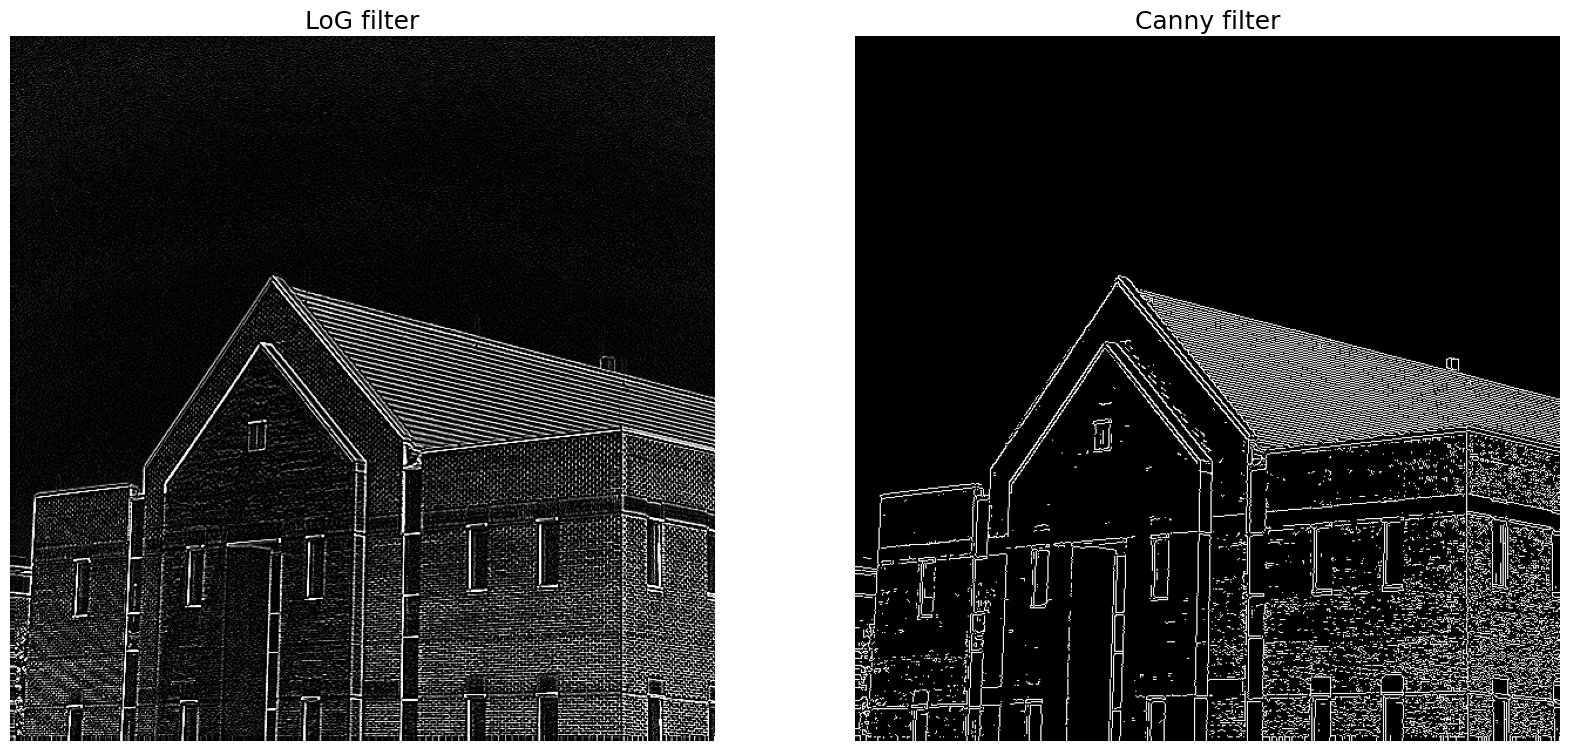

In [21]:
image = imread("pic.3.tif")

filter = np.array([[0,0,-1,0,0],
                   [0,-1,-2,-1,0],
                   [-1,-2,16,-2,-1],
                   [0,-1,-2,-1,0],
                   [0,0,-1,0,0]])

LoG = cv.filter2D(image,-1,filter)
Canny = cv.Canny(image, 80, 90) # Tk, Tn

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.axis("off")
plt.title("LoG filter", font={"size": 18})
plt.imshow(LoG, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Canny filter", font={"size": 18})
plt.imshow(Canny, cmap="gray")

plt.show()

## Обробка з глобальним порогом

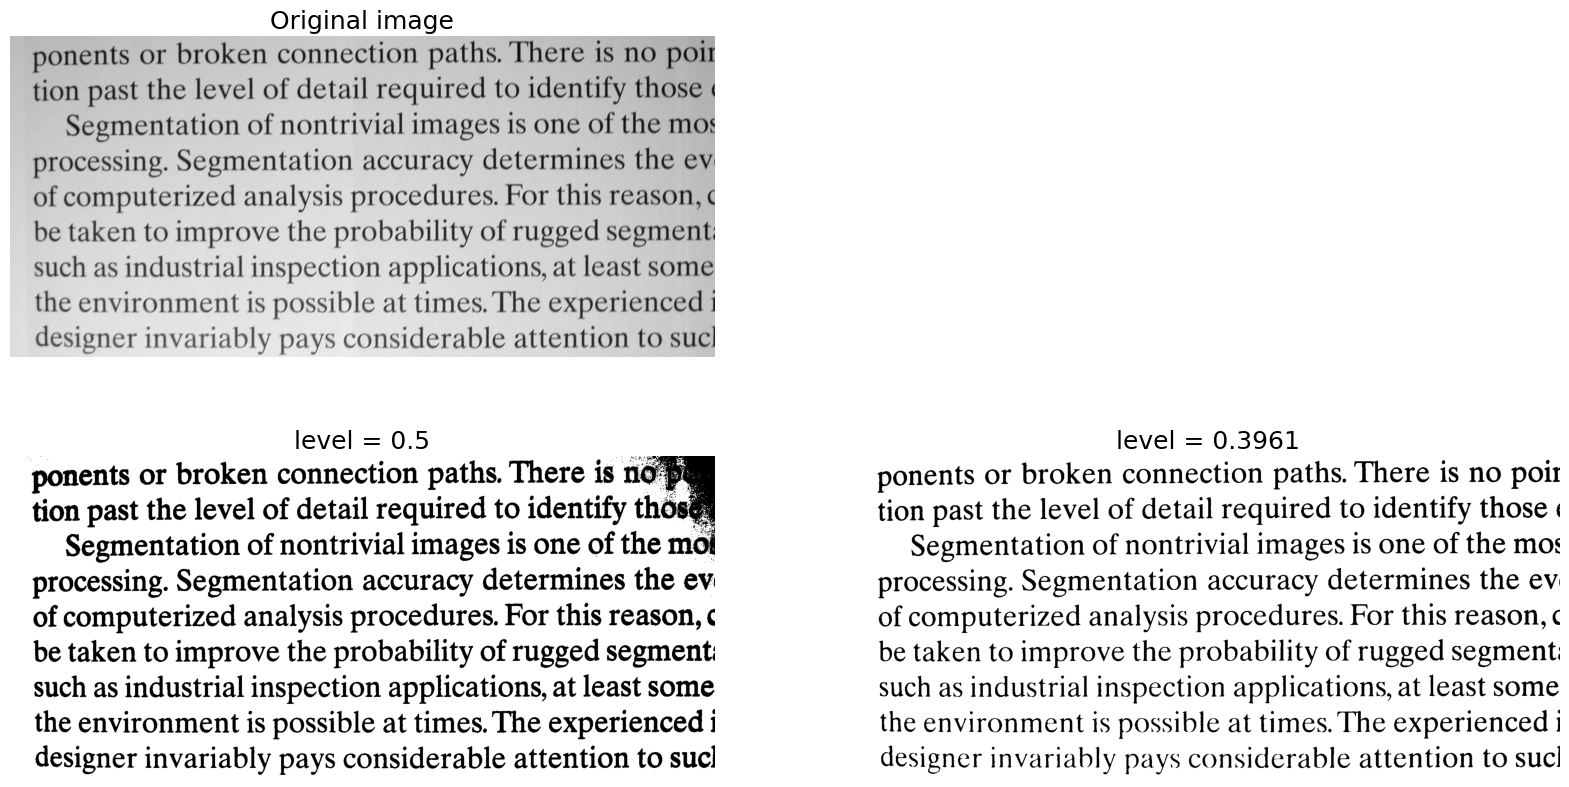

In [22]:
image = imread("pic.4.tif")

level_1 = 0.5
level_2 = file.graythresh(image)

graythresh_level_1 = cv.threshold(image, 255*level_1, 255, cv.THRESH_BINARY)[1]
graythresh_level_2 = cv.threshold(image, 255*level_2, 255, cv.THRESH_BINARY)[1]

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.axis("off")
plt.title("Original image", font={"size": 18})
plt.imshow(image, cmap="gray")

plt.subplot(2,2,3)
plt.axis("off")
plt.title(f"level = {level_1}", font={"size": 18})
plt.imshow(graythresh_level_1, cmap="gray")

plt.subplot(2,2,4)
plt.axis("off")
plt.title(f"level = {round(level_2,4)}", font={"size": 18})
plt.imshow(graythresh_level_2, cmap="gray")

plt.show()

## Сегментація по вододілам за допомогою перетворення відстані 

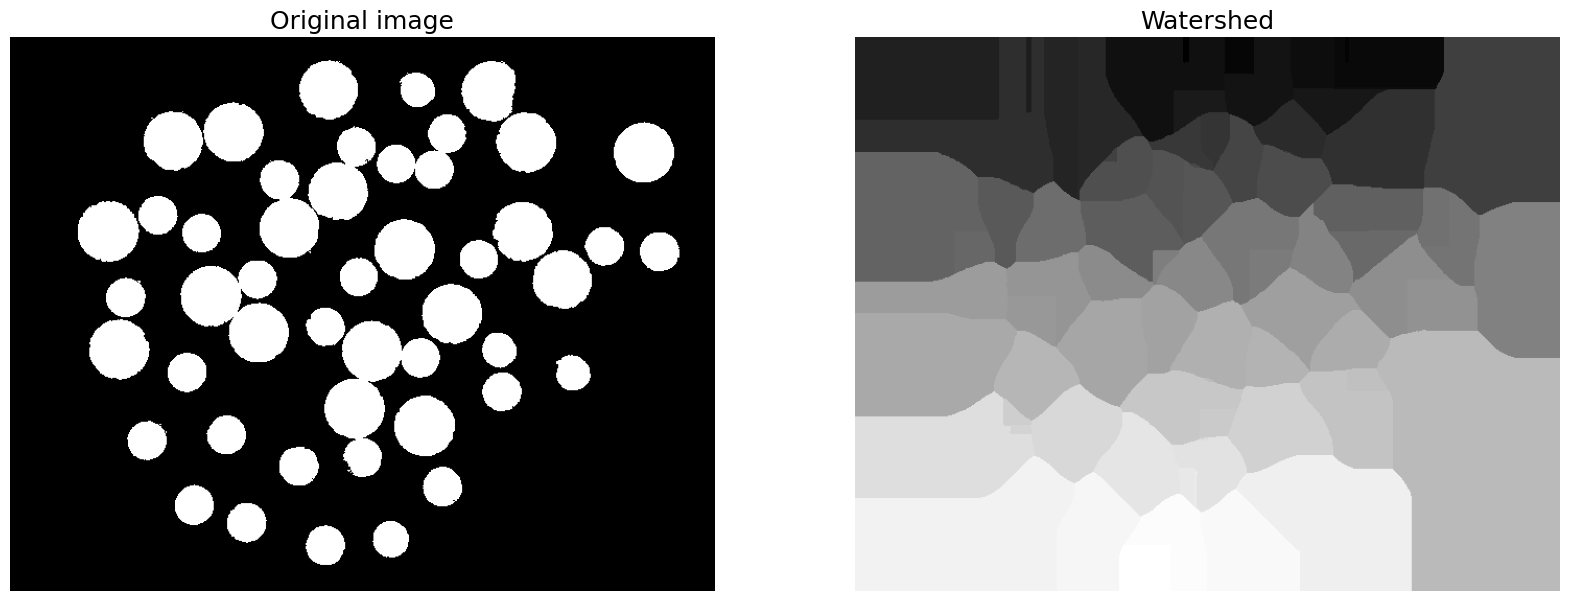

In [26]:
image = imread("pic.5.tif") # originally rgba
image_gray = cv.cvtColor(image, cv.COLOR_RGBA2GRAY)

distance = ndi.distance_transform_edt(image_gray) # еретворення відстані для бінарного зображення
watershed = ski_segmentation.watershed(-distance)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.axis("off")
plt.title("Original image", font={"size": 18})
plt.imshow(image, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Watershed", font={"size": 18})
plt.imshow(watershed, cmap="gray")

plt.show()

## Сегментація по вододілам за допомогою градієнтів

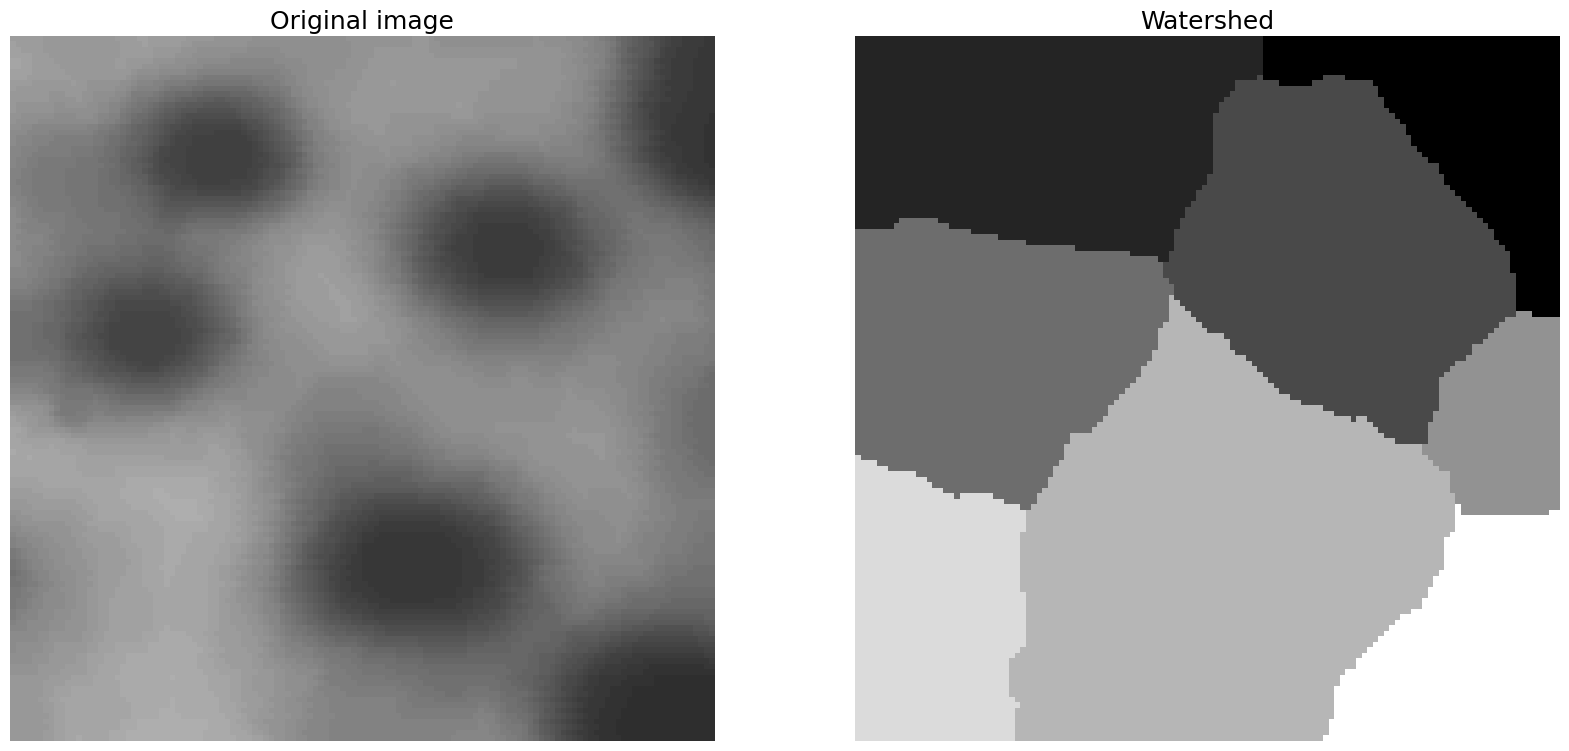

In [28]:
image = imread("pic.6.tif") # originally rgba
image_gray = cv.cvtColor(image, cv.COLOR_RGBA2GRAY)

opening = ski_morphology.opening(image_gray, square(3))
closing = ski_morphology.closing(opening, square(3))

watershed = ski_segmentation.watershed(closing)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.axis("off")
plt.title("Original image", font={"size": 18})
plt.imshow(image, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Watershed", font={"size": 18})
plt.imshow(watershed, cmap="gray")

plt.show()

## Кластеризація по k-середніх

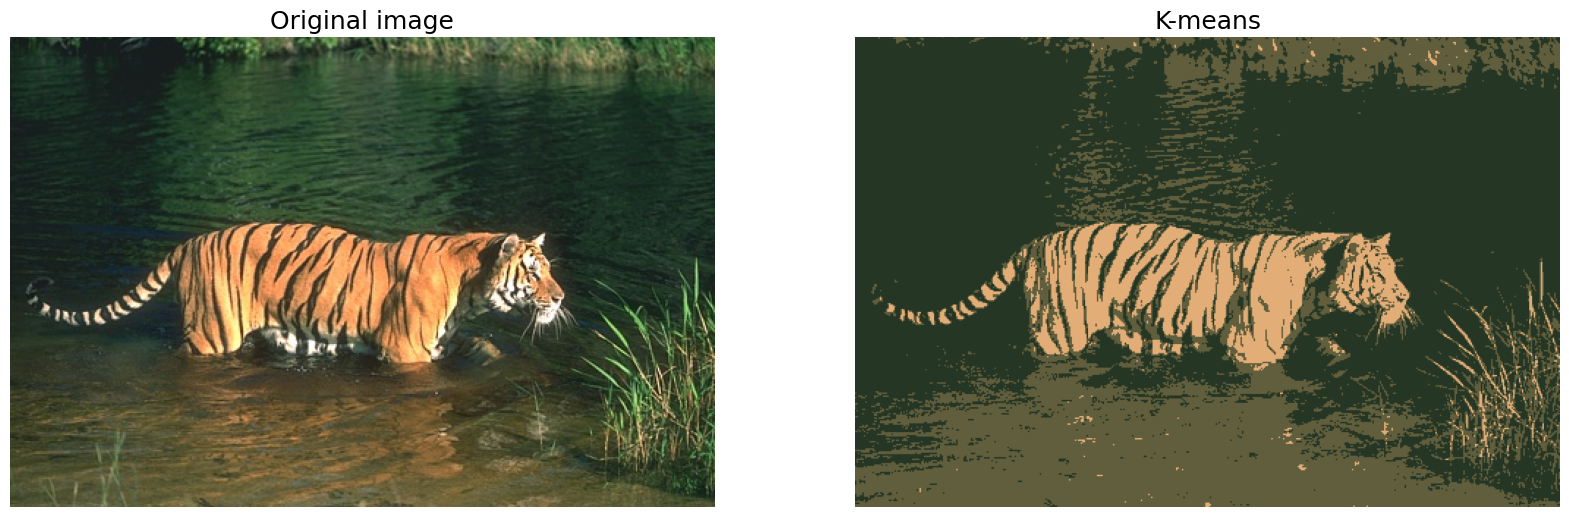

In [33]:
# https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

image = imread("pic.8.jpg")

# reshape the image to a 2D array of pixels and 3 color values (RGB) --> (154401, 3)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values) 

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3

_, labels, (centers) = cv.kmeans(
    pixel_values, 
    k, 
    None, 
    criteria, 
    attempts=10, 
    flags= cv.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.axis("off")
plt.title("Original image", font={"size": 18})
plt.imshow(image, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.title("K-means", font={"size": 18})
plt.imshow(segmented_image, cmap="gray")

plt.show()